The information ratio is a single number that measures the performance against the NASDAQ, S&P 500 benchmark. The higher the information ratio, the better the skill.

In [41]:
import numpy as np 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [42]:
data = yf.download(["QQQ", "AAPL", "AMZN"], start="2020-01-01", end="2022-07-31", auto_adjust=False)

[*********************100%***********************]  3 of 3 completed


In [43]:
closes = data['Adj Close']
benchmark_returns = closes.QQQ.pct_change()

In [44]:
# portfolio of equal shares
aapl_position = closes.AAPL * 50
amzn_position = closes.AMZN * 50
portfolio_value = aapl_position + amzn_position

In [45]:
portfolio_pnl = (
    (aapl_position - aapl_position.shift()) 
    + (amzn_position - amzn_position.shift())
)

In [46]:
# compute the portfolio daily return
portfolio_returns = (portfolio_pnl / portfolio_value)
portfolio_returns.name = "Port"

In [47]:
# compute the portfolio daily return
portfolio_returns = (portfolio_pnl / portfolio_value)

portfolio_returns.name = "Port"

<Axes: xlabel='Date'>

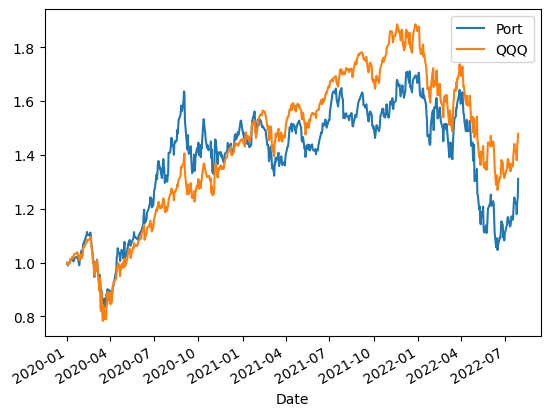

In [48]:
# prepare dataframes for plotting
portfolio_cumulative_returns = (portfolio_returns.fillna(0.0) + 1).cumprod()
benchmark_cumulative_returns = (benchmark_returns.fillna(0.0) + 1).cumprod()

# plot the cumulative portfolio v. benchmark returns
pd.concat(
    [
        portfolio_cumulative_returns, 
        benchmark_cumulative_returns
    ], 
    axis=1
).plot()

In [49]:
def information_ratio(portfolio_returns, benchmark_returns):
    """
    Determines the information ratio of a strategy.
    
    Parameters
    ----------
    portfolio_returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    benchmark_returns : int, float
        Daily returns of the benchmark or factor, noncumulative.

    Returns
    -------
    information_ratio : float
    """
    active_return = portfolio_returns - benchmark_returns
    tracking_error = active_return.std()
    
    return active_return.mean() / tracking_error

In [50]:
information_ratio(benchmark_returns, portfolio_returns)

0.014810985970861269

## 📊 Conclusion

The evaluation of the portfolio's performance against the benchmark using the **Information Ratio** has yielded a value of **0.0148**. This is a very low score and suggests that:

- The portfolio is **not significantly outperforming** the benchmark.
- Any excess return generated comes with **proportionate or higher risk**.
- The strategy may need **further refinement or optimization** to enhance its effectiveness and risk-adjusted return.

In general, an Information Ratio above 0.5 is considered acceptable, while values above 1 indicate strong performance. The current IR indicates that the portfolio is **not yet delivering consistent outperformance** relative to its benchmark on a risk-adjusted basis.